<h1 style="text-align: center;"> Hotel Reservations Dataset </h1>

<br>_Context_</br>
> The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

Can you predict if the customer is going to honor the reservation or cancel it ?

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>About Dataset</li>
        <li>Acquire data</li>
        <li>Wrangle data</li>
        <li>Model, predict and solve</li>
        <li>Conclusion</li>
        <li>References</li>

**About Dataset**

|feature|Description|
|-------|------|
|Booking_ID| unique identifier of each booking|
|no_of_adults| Number of adults|
|no_of_children| Number of Children|
|no_of_weekend_nights| Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel|
|no_of_week_nights| Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|type_of_meal_plan| Type of meal plan booked by the customer|
|required_car_parking_space| Does the customer require a car parking space? (0 - No, 1- Yes)|
|room_type_reserved| Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels|
|lead_time| Number of days between the date of booking and the arrival date
|arrival_year| Year of arrival date|
|arrival_month| Month of arrival date|
|arrival_date| Date of the month|
|market_segment_type| Market segment designation|
|repeated_guest| Is the customer a repeated guest? (0 - No, 1- Yes)|
|no_of_previous_cancellations| Number of previous bookings that were canceled by the customer prior to the current booking|
|no_of_previous_bookings_not_canceled| Number of previous bookings not canceled by the customer prior to the current booking|
|avg_price_per_room| Average price per day of the reservation; prices of the rooms are dynamic. (in euros)|
|no_of_special_requests| Total number of special requests made by the customer (e.g. high floor, view from the room, etc)|
|booking_status| Flag indicating if the booking was canceled or not|

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

<h2>Acquire data</h2>

In [2]:
# import opendatasets as od
# od.download('https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/download?datasetVersionNumber=1')

In [3]:
# read the input data
df = pd.read_csv('hotel-reservations-classification-dataset\Hotel Reservations.csv')

**Analyze by describing data**

In [4]:
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


**Which features are categorical?**
1. type_of_meal_plan
2. required_car_parking_space
3. room_type_reserved
4. market_segment_type
5. repeated_guest

**Which features are numerical?**
1. no_of_adults
2. no_of_children	
3. no_of_weekend_nights	
4. no_of_week_nights
5. lead_time
6. arrival_year	
7. arrival_month
8. arrival_date
9. no_of_previous_cancellations
10. avg_price_per_room
11. no_of_special_requests

**Which features contain blank, null or empty values?**

In [5]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

**What are the data types for various features?**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
df.describe(include=['O'])

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


**What is the distribution of categorical features?**
<li>Booking_ID are unique across the dataset (count=unique=36,275)</li>
<li>The most popular type of meal plan booked by the customer (freq=27835/count=36275=77%) </li>
<li>The most popular reserved room type. (freq=28130	/count=36275=78%)</li>
<li>With 64%, market_segment_type (online) is one of five unique values.  </li>
<li>With 67%, booking_status(Not_Canceled) is one of two possible values.</li>

<h3>Assumtions based on data analysis</h3>

<br>**Correlating**</br>
We want to know how well each feature correlates with the reservation's honor or cancel status. We want to do this early in our project and match these quick correlations with modeled correlations later in the project.

**Correcting.**
1. The Booking_ID feature may not contribute directly to the reservation's honor, so it may be dropped.

**Creating.**
1. We might want to add a new feature called "Family" that calculates the total number of family members based on the number of adults and children. 

**Converting.**
convert features which contain strings to numerical values. This is required by most model algorithms.
1. type_of_meal_plan
2. room_type_reserved 
3. booking_status

**Visualization Booking-Date-Related Features**

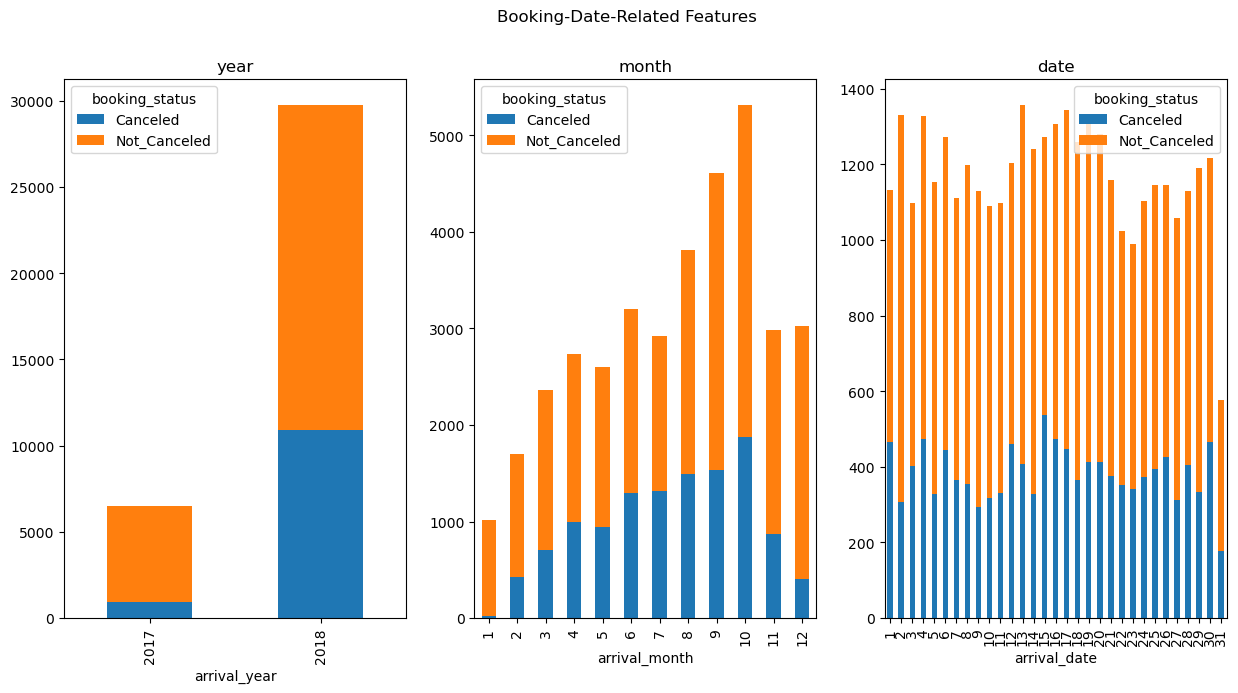

In [8]:
# Create subplots
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15, 7))
xx = df['booking_status']
# add title
fig.suptitle('Booking-Date-Related Features')

pd.crosstab(df['arrival_year'],xx).plot.bar(ax=ax1,stacked=True,title = 'year')
pd.crosstab(df['arrival_month'],xx).plot.bar(ax=ax2,stacked=True,title = 'month')
pd.crosstab(df['arrival_date'],xx).plot.bar(ax=ax3,stacked=True,title = 'date' )

# Combine all the operations and display
plt.show()

plt.close()

<li>The majority of cancellations are due to bookings made in October of the year.</li>
<li>The majority of cancellations are due to bookings made on the 16th of the month.</li>

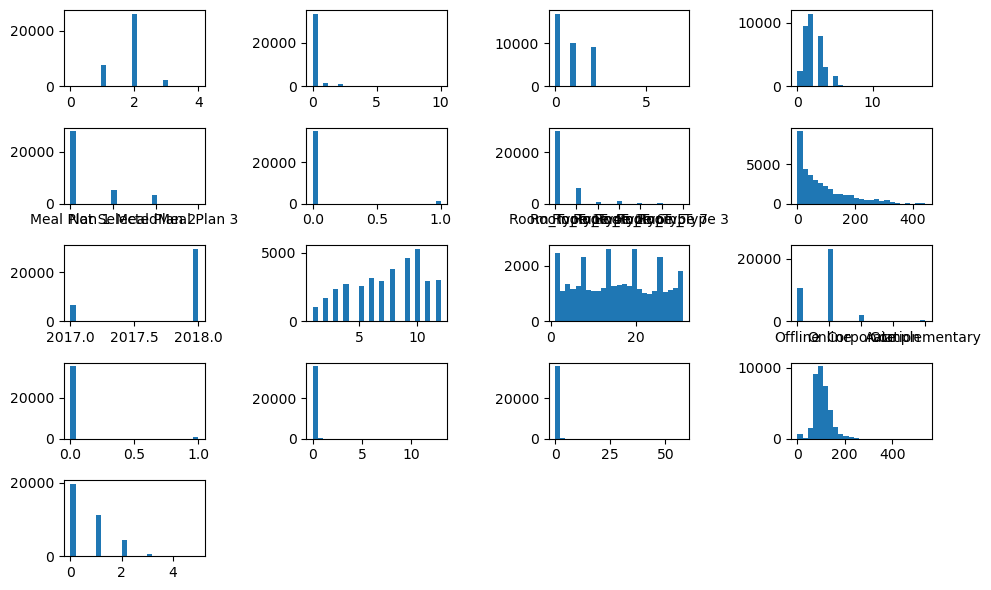

In [9]:
# histogram of the data
plt.figure(figsize=(10, 6))
dfg = df
dfg = df.drop(columns=['Booking_ID','booking_status']).values
for i in range(dfg.shape[1]):
    plt.subplot(5,4,i+1)
    plt.hist(dfg[:,i], bins=25)

plt.tight_layout()
plt.show()

On most graphs, it will be a discrete variable.

<h2>Wrangle data</h2>

**Create new feature combining existing features**

In [10]:
df['FamilySize'] = df['no_of_adults'] + df['no_of_children'] 

**Correcting by dropping features**

In [11]:
print('df shape Before: ',df.shape)
df = df.drop(['Booking_ID','no_of_adults','no_of_children'], axis=1)
print('df shape After: ',df.shape)

df shape Before:  (36275, 20)
df shape After:  (36275, 17)


**Converting a categorical feature**

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
# Encode Categorical Columns
categ = ['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status']
df[categ] = df[categ].apply(le.fit_transform)
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'Canceled': 0, 'Not_Canceled': 1}


In [15]:
# Separating into features variables and target variable.
X = df.drop('booking_status', axis = 1)
y = df['booking_status']

In [16]:
y.value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

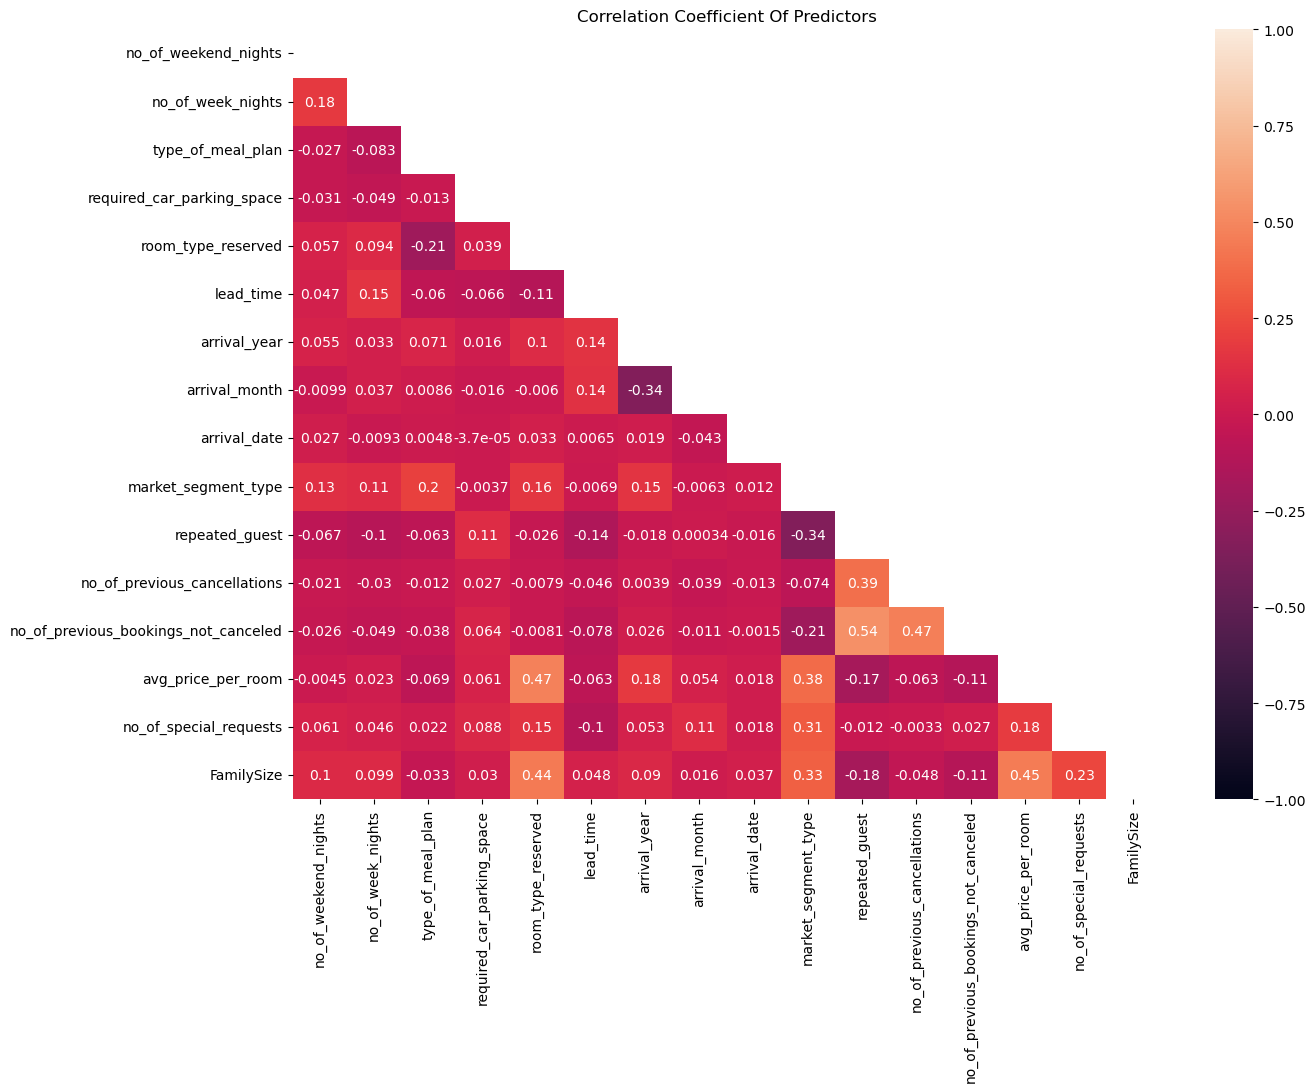

In [17]:
# Draw the heatmap
# set figure size
plt.figure(figsize=(14,10))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(X.corr(), dtype=bool))

# generate heatmap
sns.heatmap(X.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

The dataset doesn't have multicollinearity between the variables.

**Imbalanced Data**

In [18]:
from imblearn.over_sampling import RandomOverSampler
from imblearn import FunctionSampler
from collections import Counter

In [19]:
ros = RandomOverSampler(random_state=42)
print('Original dataset shape %s' % Counter(y))
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s'% Counter(y_res))

Original dataset shape Counter({1: 24390, 0: 11885})
Resampled dataset shape Counter({1: 24390, 0: 24390})


In [20]:
# License: MIT
# Compare over-sampling samplers
def plot_resampling(X, y, sampler, ax, title=None):
    X_res, y_res = sampler.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor="k")
    if title is None:
        title = f"Resampling with {sampler.__class__.__name__}"
    ax.set_title(title)
    sns.despine(ax=ax, offset=10)

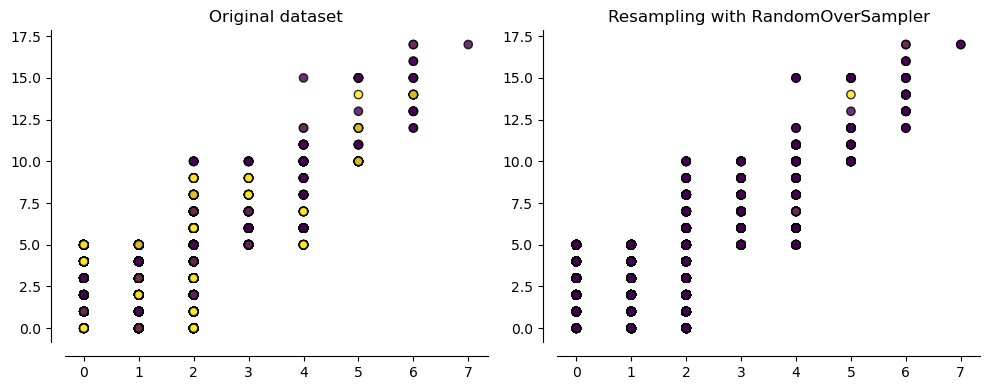

In [21]:
# plot gragh
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

samplers = [FunctionSampler(),RandomOverSampler(random_state=42)]

for ax, sampler in zip(axs.ravel(), samplers):
    title = "Original dataset" if isinstance(sampler, FunctionSampler) else None
    plot_resampling(X.to_numpy(), y, sampler, ax, title=title)
    
fig.tight_layout()

## Model, predict and solve

**StandardScaler**

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_standard = pd.DataFrame(scaler.fit_transform(X_res),columns=X_res.columns, index=X_res.index)

**Transforming Data into Train / Test**

In [24]:
#scikit-learn
from sklearn.model_selection import train_test_split

In [25]:
# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_standard, y_res, test_size=0.7, random_state=42)
print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)
print("X_test shape :", X_test.shape)
print("y_test shape :", y_test.shape)

X_train shape : (14634, 16)
y_train shape : (14634,)
X_test shape : (34146, 16)
y_test shape : (34146,)


**Naive Bayes**

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
# Train and fit the model: naive_bayes classifier
gnb = GaussianNB().fit(X_train, y_train)

# Evaluate the model's accuracy
print("For Random Forest model:")
acc_gnb_tr = gnb.score(X_train, y_train)
acc_gnb_ts = gnb.score(X_test, y_test)
print("Train set accuracy = " + str(acc_gnb_tr))
print("Test set accuracy = " + str(acc_gnb_ts))

y_pred_gnb = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred_gnb).sum()))

For Random Forest model:
Train set accuracy = 0.5686756867568675
Test set accuracy = 0.5688514027997423
Number of mislabeled points out of a total 34146 points : 14722


It's definitely not a good model because test-set accuracy is 56.89%.

**Logistic Regression**

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
# Train and fit the model
logreg = LogisticRegression(random_state=42).fit(X_train,y_train)

# Evaluate the model's accuracy
print("For Logistic Regression model:")
acc_lr_tr = logreg.score(X_train, y_train)
acc_lr_ts = logreg.score(X_test, y_test)
print("Train set accuracy = " + str(acc_lr_tr))
print("Test set accuracy = " + str(acc_lr_ts))

y_pred_logr = logreg.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred_logr).sum()))

For Logistic Regression model:
Train set accuracy = 0.7757960912942463
Test set accuracy = 0.7780999238563814
Number of mislabeled points out of a total 34146 points : 7577


The test set's accuracy improved from  56.89% to 77.81% using Logistic Regression.

In [30]:
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
14,no_of_special_requests,1.005602
3,required_car_parking_space,0.247813
10,repeated_guest,0.197803
12,no_of_previous_bookings_not_canceled,0.127951
7,arrival_month,0.102720
4,room_type_reserved,0.088328
15,FamilySize,-0.002469
8,arrival_date,-0.039071
11,no_of_previous_cancellations,-0.056706
1,no_of_week_nights,-0.065321


Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

**Decision Tree**

In [31]:
from sklearn import tree
from IPython import display
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [32]:
# Train and fit the model
dtree = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)

# Evaluate the model's accuracy
print("For Decision Tree model:")
acc_t_tn = dtree.score(X_train, y_train)
acc_t_ts = dtree.score(X_test, y_test)
print("Train set accuracy = " + str(acc_t_tn))
print("Test set accuracy = " + str(acc_t_ts))

y_pred_tree = dtree.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred_tree).sum()))

For Decision Tree model:
Train set accuracy = 0.8157031570315704
Test set accuracy = 0.8136238505242195
Number of mislabeled points out of a total 34146 points : 6364


The Decision Tree gets the test set's accuracy of 81.36%

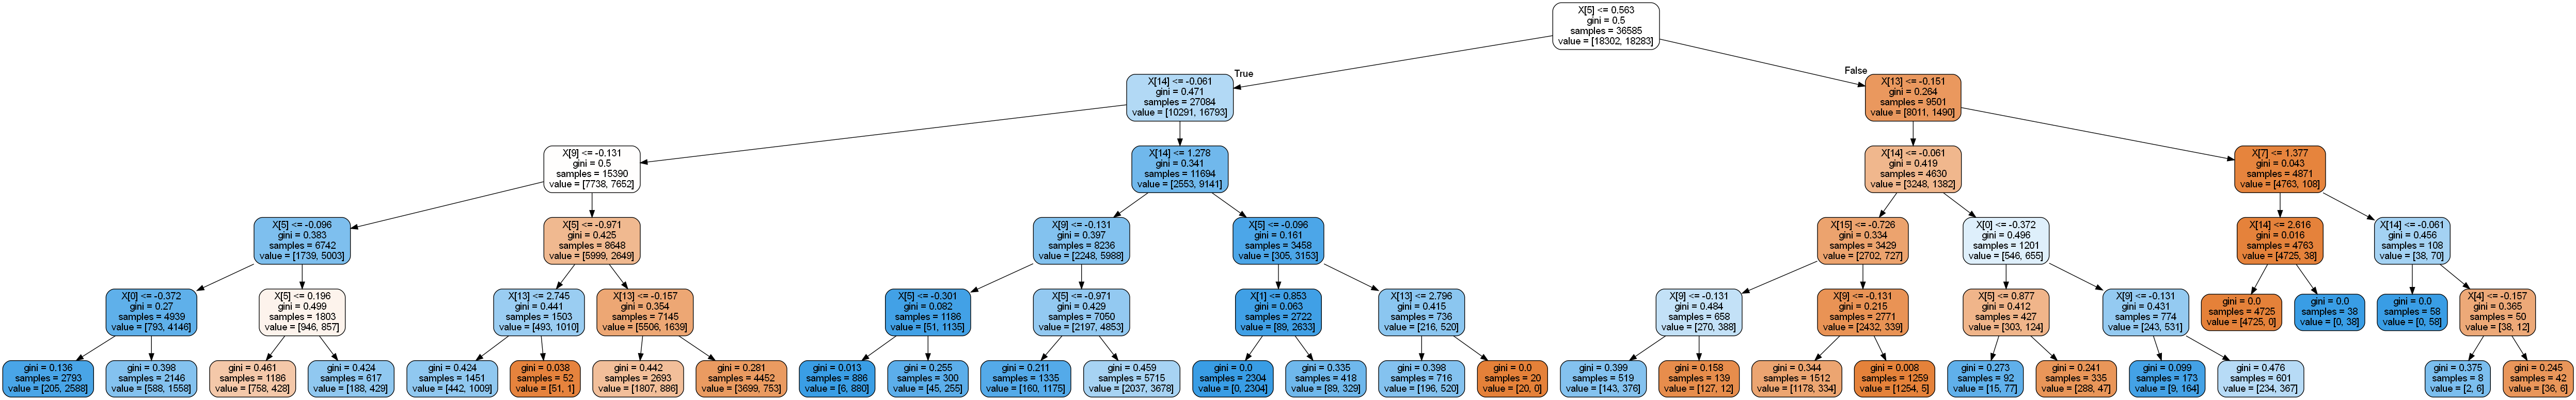

In [33]:
# Export graph
# set figure size
dot_data = tree.export_graphviz(dtree)  
graph = graphviz.Source(dot_data)
# save in to a pdf file
graph.render("tree")
display.Image("tree.png")

In [34]:
# Determine features' importances
columns = X_standard.columns
feature_imp = pd.Series(dtree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

lead_time                               0.497919
market_segment_type                     0.200608
no_of_special_requests                  0.178733
avg_price_per_room                      0.049107
FamilySize                              0.025586
no_of_weekend_nights                    0.022333
required_car_parking_space              0.010647
arrival_month                           0.009637
no_of_week_nights                       0.003587
type_of_meal_plan                       0.001843
room_type_reserved                      0.000000
arrival_year                            0.000000
arrival_date                            0.000000
repeated_guest                          0.000000
no_of_previous_cancellations            0.000000
no_of_previous_bookings_not_canceled    0.000000
dtype: float64

**Support Vector Machine**

In [35]:
from sklearn.svm import SVC

In [36]:
# Train and fit the model: Support Vector Machine
svmm = SVC().fit(X_train, y_train)

# Evaluate the model's accuracy
print("For Support Vector Machine model:")
acc_svm_tr = svmm.score(X_train, y_train)
acc_svm_ts = svmm.score(X_test, y_test)
print("Train set accuracy = " + str(acc_svm_tr))
print("Test set accuracy = " + str(acc_svm_ts))

y_pred_svmm = svmm.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred_svmm).sum()))

For Support Vector Machine model:
Train set accuracy = 0.8299849665163318
Test set accuracy = 0.8230246588180168
Number of mislabeled points out of a total 34146 points : 6043


The Support Vector Machine gets the test set's accuracy of 82.30%

**Random Forest**

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Train and fit the model: random forest classifier
rforest = RandomForestClassifier().fit(X_train, y_train)

# Evaluate the model's accuracy
print("For Random Forest model:")
acc_rf_tr = rforest.score(X_train, y_train)
acc_rf_ts = rforest.score(X_test, y_test)
print("Train set accuracy = " + str(acc_rf_tr))
print("Test set accuracy = " + str(acc_rf_ts))

y_pred_rforest = rforest.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred_rforest).sum()))

For Random Forest model:
Train set accuracy = 0.9939182725160585
Test set accuracy = 0.9070754993264218
Number of mislabeled points out of a total 34146 points : 3173


The test set's accuracy improved from 82.30% to 90.71% using Random Forest.

In [39]:
# Determine features' importances
columns = X_standard.columns
feature_imp_ran = pd.Series(rforest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_ran

lead_time                               0.317088
avg_price_per_room                      0.151269
no_of_special_requests                  0.107171
arrival_date                            0.090275
arrival_month                           0.084495
market_segment_type                     0.059248
no_of_week_nights                       0.050803
no_of_weekend_nights                    0.036912
arrival_year                            0.027930
FamilySize                              0.026883
type_of_meal_plan                       0.018574
room_type_reserved                      0.016517
required_car_parking_space              0.007066
repeated_guest                          0.002977
no_of_previous_bookings_not_canceled    0.002454
no_of_previous_cancellations            0.000338
dtype: float64

**Decision boundary**

In [40]:
# Select only two features from the importance list. 
cols = ['lead_time','avg_price_per_room']
X_selected = df[cols].values

In [41]:
# Split the selected data into train and test set
X_train_select, X_test_select, y_train, y_test = train_test_split(X_selected, y, random_state=42)

# Train and fit the model: decision tree
rforest_im = RandomForestClassifier(n_estimators=200).fit(X_train_select, y_train)

# Evaluate the model's accuracy
print("For Random Forest model (with selected X):")
print("Train set accuracy = " + str(rforest_im.score(X_train_select, y_train)))
print("Test set accuracy = " + str(rforest_im.score(X_test_select, y_test)))

For Random Forest model (with selected X):
Train set accuracy = 0.9495331912078218
Test set accuracy = 0.8093505347888411


80.94% less than 90.71% moderately, because we select two features to train. 

In [42]:
# Plot the decision boundaries
def plot_decision_boundary(X,y,clf=None):
    h = 0.003  # Boundary lines' resolution
    fig=plt.figure(figsize=(10,6))
    ax = plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y,cmap='viridis',s=30, zorder=3)
    ax.axis('tight')
    ax.axis('on')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    n_classes = len(np.unique(y))
    plt.contourf(xx, yy, Z, cmap='Paired', alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines

    ax.set(xlim=xlim, ylim=ylim)

Text(0, 0.5, 'worst radius')

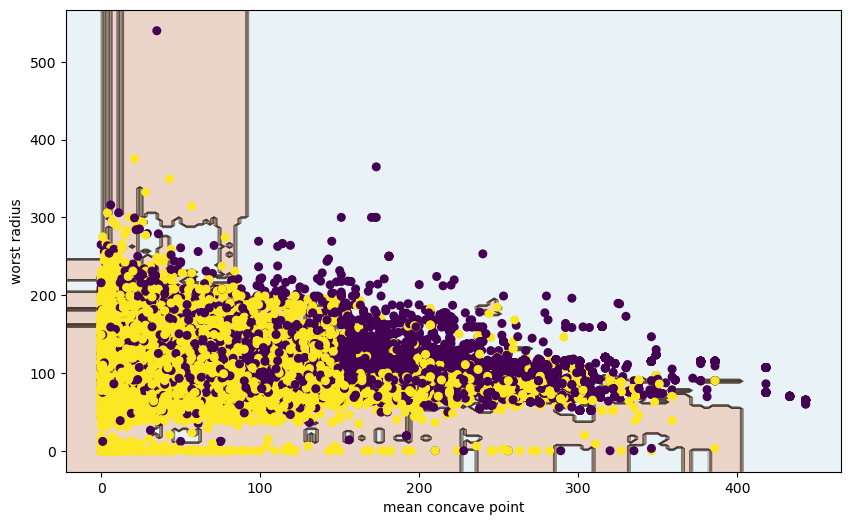

In [43]:
plot_decision_boundary(X_selected,y,rforest_im)
plt.xlabel('mean concave point')
plt.ylabel('worst radius')

**Model evaluation**

In [44]:
models = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 
              'Support Vector Machine', 'Random Forest'],
    'Score': [acc_gnb_ts, acc_lr_ts, acc_t_ts, 
              acc_svm_ts, acc_rf_ts]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,0.907075
3,Support Vector Machine,0.823025
2,Decision Tree,0.813624
1,Logistic Regression,0.778100
0,Naive Bayes,0.568851


 ## Conclusion

<li>Reservations with a high lead time and a high average price per room are more likely to be canceled.</li>
<li>The number of previous cancellations has the least impact on cancelled reservations.</li>
<li>The best model was the Random Forest with 91% accuracy </li>

___

## References
<br>[Hotel Reservations Dataset](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/code?datasetId=2783627&sortBy=voteCount)</br>
<br>[Machine Learning](https://guopai.github.io/)</br>
<br>[Decision Boundaries](https://www.kdnuggets.com/2015/06/decision-boundaries-deep-learning-machine-learning-classifiers.html)</br>

___

Gawragod Kuchaiyaphum